# In this notebook I'll predect the genre of a movie based on labeled movie posters with title, release year, rating, and genre from the duplicate_free_movies.csv file.

## About this dataset

Movie posters play a crucial role in providing initial impressions to movie viewers, offering valuable cues about the movie's content and genre. Through color, facial expressions of actors, and other visual elements, humans can quickly identify the genre of a movie, whether it's horror, comedy, animation, and so on. Research has indicated that various color attributes such as hues, saturation, brightness, and contours can evoke specific emotions in humans, which are triggered by different situations. If humans can accurately predict the genre of a movie at a single glance of its poster, it suggests that the color characteristics, local texture-based features, and structural cues of these posters possess certain qualities that could be harnessed in machine learning algorithms to predict the genre.


The dataset used in this study was sourced from the IMDB website and consists of poster images from predominantly Hollywood movies released between 1980 and 2015. Each poster image is linked to a corresponding movie and includes additional metadata such as an ID, genre information, and box office data. The file name of each image serves as its unique identifier within the dataset.

## Features

* id: A unique identifier for each entry in the dataset.

* poster: The URL or path to the movie poster image.
* title: The title of the movie.
* year: The year of release for the movie.
* rating: The average rating of the movie.
* genre: The genre(s) of the movie.
* action: A binary indicator (0 or 1) representing whether the movie belongs to the action genre.
* adventure: A binary indicator (0 or 1) representing whether the movie belongs to the adventure genre.
* animation: A binary indicator (0 or 1) representing whether the movie belongs to the animation genre.

and so on...

## hypothesis

Based on the knowledge acquired during this course, I have learned that Convolutional Neural Networks (CNNs) are highly effective for image-related tasks. Therefore, I will utilize CNNs to predict the genre of movies by analyzing their posters.

Furthermore, I would like to explore the application of Residual Neural Networks (ResNet) for predicting the genre of movies based on posters. I have previously experimented with ResNet in my Deep Learning class, and I am interested in testing its performance on this dataset. I will compare the results of ResNet and CNN to understand which architecture is more effective for genre prediction.

In my opinion, based on the experience I have gained, I believe that CNN would demonstrate superior performance.

## 1. Data understanding

In [1]:
# Importing packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import cv2
import random
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [19]:
# walkthrough the dataset
def dir_walkthrough(path):

    

    '''
    shows the contents of the file directory
    '''
    for dirname, folders, files in os.walk(path):
        img_extension = ['jpg','jpeg','png','webp','tiff','tif','bmp','gif']
        video_extension = ['mp4','m4a','3gp','mkv','xvid','vob','mov','wmv','avi']
        image_files = []
        video_files = []
        other_files = []

        for file in files:
            extension = file.split('.')[-1]
            if extension in img_extension:
                image_files.append(file)
            elif extension in video_extension:
                video_files.append(file)
            else:
                other_files.append(file)
            
        print(f'''{dirname} contains ::
        folders     = {len(folders)}  
        images      = {len(image_files)} 
        videos      = {len(video_files)} 
        other files = {len(other_files)}  
        total files {len(files)}''')

In [20]:
path = 'D:/University/3e_jaar/AAI-Minor/minor-logboek-aai-2/machinelearning/movie_genre_dataset/img_41K'
dir_walkthrough(path)

D:/University/3e_jaar/AAI-Minor/minor-logboek-aai-2/machinelearning/movie_genre_dataset/img_41K contains ::
        folders     = 0  
        images      = 41979 
        videos      = 0 
        other files = 0  
        total files 41979


In [21]:
# loading the dataset
df = pd.read_csv('duplicate_free_41K.csv')
# previewing the first 10 rows
df.head(10)

id                                             poster  \
0   0  https://m.media-amazon.com/images/M/MV5BNDM0ND...   
1   1  https://m.media-amazon.com/images/M/MV5BNTgyZD...   
2   2  https://m.media-amazon.com/images/M/MV5BNGQzMT...   
3   3  https://m.media-amazon.com/images/M/MV5BMWE2Yz...   
4   4  https://m.media-amazon.com/images/M/MV5BOGI0Nz...   
5   5  https://m.media-amazon.com/images/M/MV5BNDU3YT...   
6   6  https://m.media-amazon.com/images/M/MV5BZThmOW...   
7   7  https://m.media-amazon.com/images/M/MV5BZWU4Y2...   
8   8  https://m.media-amazon.com/images/M/MV5BOThkZT...   
9   9  https://m.media-amazon.com/images/M/MV5BNWE1Mz...   

                     title  year  rating                     genre  action  \
0             Construction  2021     7.4           comedy, romance       0   
1                      RED  2020    10.0                    horror       0   
2  Huldra and Photographer  2020    10.0    short, fantasy, horror       0   
3                Anti-dirt  2020    10.0     short, action, comedy       1   
4   Asalu Em Jarigindhante  2020    10.0                     drama       0   
5     The Zone of Twilight  2020     9.9    action, horror, sci-fi       1   
6                Hollywood  2020     9.8             comedy, crime       0   
7               Redemption  2020     9.8   short, sci-fi, thriller       0   
8               Dead water  2020     9.8  short, fantasy, thriller       0   
9        In Your Afterglow  2020     9.8            drama, romance       0   

   adventure  animation  comedy  crime  drama  fantasy  horror  mystery  \
0          0          0       1      0      0        0       0        0   
1          0          0       0      0      0        0       1        0   
2          0          0       0      0      0        1       1        0   
3          0          0       1      0      0        0       0        0   
4          0          0       0      0      1        0       0        0   
5          0          0       0      0      0        0       1        0   
6          0          0       1      1      0        0       0        0   
7          0          0       0      0      0        0       0        0   
8          0          0       0      0      0        1       0        0   
9          0          0       0      0      1        0       0        0   

   romance  sci-fi  short  thriller  
0        1       0      0         0  
1        0       0      0         0  
2        0       0      1         0  
3        0       0      1         0  
4        0       0      0         0  
5        0       1      0         0  
6        0       0      0         0  
7        0       1      1         1  
8        0       0      1         1  
9        1       0      0         0

In [22]:
# checking the shape of the dataset
df.shape

(41979, 19)

In [23]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41979 entries, 0 to 41978
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41979 non-null  int64  
 1   poster     41979 non-null  object 
 2   title      41979 non-null  object 
 3   year       41979 non-null  int64  
 4   rating     41979 non-null  float64
 5   genre      41979 non-null  object 
 6   action     41979 non-null  int64  
 7   adventure  41979 non-null  int64  
 8   animation  41979 non-null  int64  
 9   comedy     41979 non-null  int64  
 10  crime      41979 non-null  int64  
 11  drama      41979 non-null  int64  
 12  fantasy    41979 non-null  int64  
 13  horror     41979 non-null  int64  
 14  mystery    41979 non-null  int64  
 15  romance    41979 non-null  int64  
 16  sci-fi     41979 non-null  int64  
 17  short      41979 non-null  int64  
 18  thriller   41979 non-null  int64  
dtypes: float64(1), int64(15), object(3)
memory usa

<b>

Machine learning algorithms typically prefer working with numerical data types. Therefore, if I were to predict the genre based on those features, I would need to convert the object data type to an integer or another suitable numerical representation.

However, since I will not be utilizing them in this specific context, I can leave the data type as it is for now.

In [24]:
# checking the null values
null_vallues = (df == 0).sum()

null_vallues


id               1
poster           0
title            0
year             0
rating           0
genre            0
action       31442
adventure    36286
animation    36661
comedy       27569
crime        35860
drama        25661
fantasy      38160
horror       34688
mystery      37219
romance      34547
sci-fi       38370
short        37824
thriller     34880
dtype: int64

<b>

In this dataset, the presence of null values actually carries meaningful information, so there is no need for us to take any action regarding them.

In [25]:
# checking nan values
df.isna().sum()

id           0
poster       0
title        0
year         0
rating       0
genre        0
action       0
adventure    0
animation    0
comedy       0
crime        0
drama        0
fantasy      0
horror       0
mystery      0
romance      0
sci-fi       0
short        0
thriller     0
dtype: int64

## 2. Data preparation

In [26]:
# dropping some unnecessary columns since we predicting the genre using the poster
df.drop(['poster','title','year','rating'], axis = 1, inplace = True)

# checking the shape of the dataset
df.shape

(41979, 15)

In [27]:
# cearating a new column for file full image path
df['image_path'] = df['id'].apply(lambda x: 'D:/University/3e_jaar/AAI-Minor/minor-logboek-aai-2/machinelearning/movie_genre_dataset/img_41K/'+str(x)+'.jpg')


In [28]:
# previewing the first 10 rows
df.head(10)

id                     genre  action  adventure  animation  comedy  crime  \
0   0           comedy, romance       0          0          0       1      0   
1   1                    horror       0          0          0       0      0   
2   2    short, fantasy, horror       0          0          0       0      0   
3   3     short, action, comedy       1          0          0       1      0   
4   4                     drama       0          0          0       0      0   
5   5    action, horror, sci-fi       1          0          0       0      0   
6   6             comedy, crime       0          0          0       1      1   
7   7   short, sci-fi, thriller       0          0          0       0      0   
8   8  short, fantasy, thriller       0          0          0       0      0   
9   9            drama, romance       0          0          0       0      0   

   drama  fantasy  horror  mystery  romance  sci-fi  short  thriller  \
0      0        0       0        0        1       0      0         0   
1      0        0       1        0        0       0      0         0   
2      0        1       1        0        0       0      1         0   
3      0        0       0        0        0       0      1         0   
4      1        0       0        0        0       0      0         0   
5      0        0       1        0        0       1      0         0   
6      0        0       0        0        0       0      0         0   
7      0        0       0        0        0       1      1         1   
8      0        1       0        0        0       0      1         1   
9      1        0       0        0        1       0      0         0   

                                          image_path  
0  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
1  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
2  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
3  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
4  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
5  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
6  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
7  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
8  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
9  D:/University/3e_jaar/AAI-Minor/minor-logboek-...

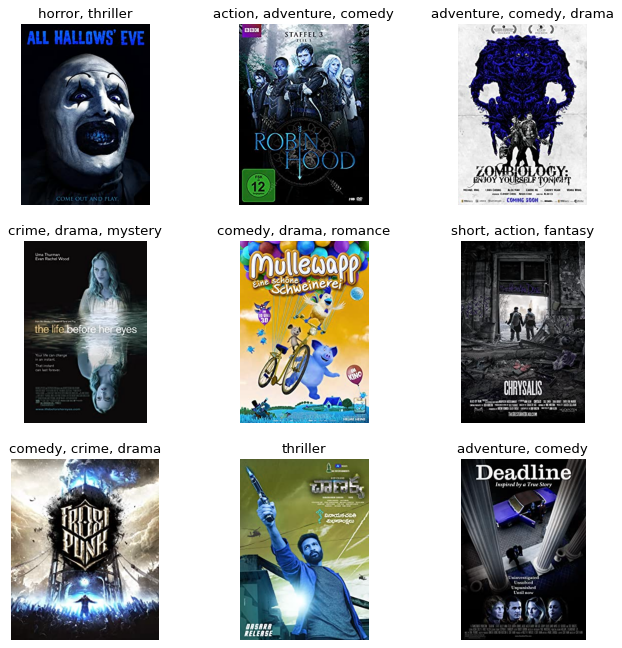

In [29]:
# plot 9 random images with its genre
figure(figsize=(10, 10), dpi=80)
for i in range(9):
    plt.subplot(3,3,i+1)
    img = cv2.imread(df['image_path'][random.randint(0,df.shape[0])])
    plt.imshow(img)
    plt.title(df['genre'][random.randint(0,df.shape[0])])
    plt.axis('off')

In [30]:
# cleaning the dataset
new_df = df.drop(['id','genre'], axis = 1)

# previewing the first 10 rows
new_df.head(10)

action  adventure  animation  comedy  crime  drama  fantasy  horror  \
0       0          0          0       1      0      0        0       0   
1       0          0          0       0      0      0        0       1   
2       0          0          0       0      0      0        1       1   
3       1          0          0       1      0      0        0       0   
4       0          0          0       0      0      1        0       0   
5       1          0          0       0      0      0        0       1   
6       0          0          0       1      1      0        0       0   
7       0          0          0       0      0      0        0       0   
8       0          0          0       0      0      0        1       0   
9       0          0          0       0      0      1        0       0   

   mystery  romance  sci-fi  short  thriller  \
0        0        1       0      0         0   
1        0        0       0      0         0   
2        0        0       0      1         0   
3        0        0       0      1         0   
4        0        0       0      0         0   
5        0        0       1      0         0   
6        0        0       0      0         0   
7        0        0       1      1         1   
8        0        0       0      1         1   
9        0        1       0      0         0   

                                          image_path  
0  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
1  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
2  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
3  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
4  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
5  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
6  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
7  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
8  D:/University/3e_jaar/AAI-Minor/minor-logboek-...  
9  D:/University/3e_jaar/AAI-Minor/minor-logboek-...

<b>
Now the data is prepared and ready to be utilized in machine learning algorithms.

## 4.1 Modeling & Validation (CNN)

In [31]:
# The dataset will be split into an 80% training set and a 20% validation set.
train_df, val_df = train_test_split(new_df, test_size = 0.2, random_state = 42)

# checking the shape of the training dataset
print('The shape of the training dataset is {}'.format(train_df.shape))

# checking the shape of the validation dataset
print('The shape of the validation dataset is {}'.format(val_df.shape))

The shape of the training dataset is (33583, 14)
The shape of the validation dataset is (8396, 14)


In [32]:

# importing the required packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

labels = ['action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'fantasy', 'horror', 'mystery', 'romance', 'sci-fi', 'short',
       'thriller']

BATCH_SIZE = 64
IMAGE_SIZE = (256,256)

# creating Image generatory for training /testing and validation
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,           
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col="image_path",
    y_col=labels,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col="image_path",
    y_col=labels,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='raw')

Found 33583 validated image filenames.
Found 8396 validated image filenames.


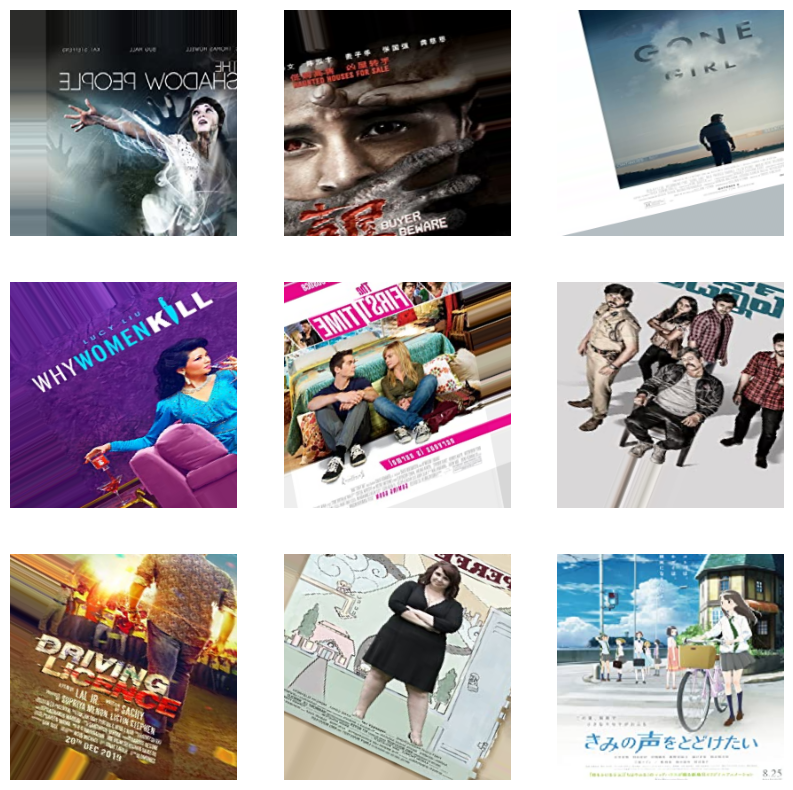

In [56]:
# previewing the first 10 images
imgs, labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imgs[i])
    plt.axis('off')

In [37]:
#model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout

In [38]:
input1 = keras.layers.Input(shape = IMAGE_SIZE+(3,))
conv1 = Conv2D(32, (3,3), activation = 'relu')(input1)
pool1 = MaxPool2D((2,2))(conv1)
conv2 = Conv2D(64, (3,3), activation = 'relu')(pool1)
pool2 = MaxPool2D((2,2))(conv2)
conv3 = Conv2D(128, (3,3), activation = 'relu')(pool2)
pool3 = MaxPool2D((2,2))(conv3)
conv4 = Conv2D(256, (3,3), activation = 'relu')(pool3)
pool4 = MaxPool2D((2,2))(conv4)
conv5 = Conv2D(512, (3,3), activation = 'relu')(pool4)
pool5 = MaxPool2D((2,2))(conv5)
flat = Flatten()(pool5)
dense1 = Dense(512, activation = 'relu')(flat)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu')(dense3)
dense5 = Dense(32, activation = 'relu')(dense4)
output = Dense(13, activation = 'sigmoid')(dense5)

model = keras.Model(inputs = input1, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856 

In [39]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# training the model
history = model.fit(train_generator, epochs = 5, validation_data = val_generator)

Epoch 1/5
525/525 [==============================] - 1754s 3s/step - loss: 0.4321 - accuracy: 0.2162 - val_loss: 0.4275 - val_accuracy: 0.2605
Epoch 2/5
525/525 [==============================] - 3791s 7s/step - loss: 0.4174 - accuracy: 0.2515 - val_loss: 0.4162 - val_accuracy: 0.2955
Epoch 3/5
525/525 [==============================] - 2132s 4s/step - loss: 0.4101 - accuracy: 0.2809 - val_loss: 0.4053 - val_accuracy: 0.3056
Epoch 4/5
525/525 [==============================] - 1741s 3s/step - loss: 0.4037 - accuracy: 0.3078 - val_loss: 0.3973 - val_accuracy: 0.3327
Epoch 5/5
525/525 [==============================] - 1627s 3s/step - loss: 0.4002 - accuracy: 0.3163 - val_loss: 0.3952 - val_accuracy: 0.3546


In [42]:
# save the model with
model.save('movie_genre_model.h5')

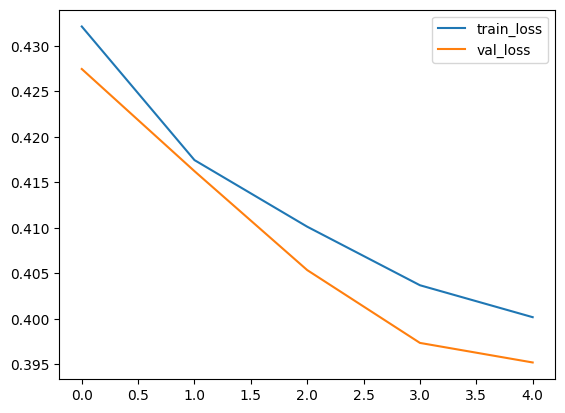

In [43]:
# plotting the loss 
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

<b>

Based on my observations, the training curve is almost starting to flatten out, indicating that the model may benefit from further training.  Furthermore, the validation plot exhibits a 'small' gap between the validation loss and the training loss. By continuing the training process, it is possible for the validation loss curve to decrease and eventually stabilize.

In [44]:
# The accuracy of the model on the validation set
print('The accuracy of the model on the validation set is {}'.format(model.evaluate(val_generator)[1]))

# The accuracy of the model on the training set
print('The accuracy of the model on the training set is {}'.format(model.evaluate(train_generator)[1]))

132/132 [==============================] - 139s 1s/step - loss: 0.3952 - accuracy: 0.3546
The accuracy of the model on the validation set is 0.3545736074447632
525/525 [==============================] - 858s 2s/step - loss: 0.3971 - accuracy: 0.3283
The accuracy of the model on the training set is 0.3282613158226013


<b>

The fact that the The accuracy of the model on the training set is 0.33 and The accuracy of the model on the validation set is 0.35, this suggests that the model might be underperforming and is not able to capture the underlying patterns or relationships in the data effectively.A low accuracy on both the training and validation sets can indicate issues such as underfitting (the model is too simple and is not able to capture the complexity of the data).

I will leave the model like that for now and see test it with some posters.

In [81]:
#load the model
model = keras.models.load_model('movie_genre_model.h5')

In [65]:
# Defining some Fuctions to predict and plot the Image with predicted Labels from the validation set
def predict_image(path):
    img = image.load_img(path, target_size = IMAGE_SIZE)
    img = image.img_to_array(img)/255
    img = np.expand_dims(img, axis = 0)
    prediction = model.predict(img)
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()
    for i in range(len(labels)):
        if prediction[0][i] > 0.5:
            print(labels[i])

def plot_image(path):
    img = image.load_img(path, target_size = IMAGE_SIZE)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

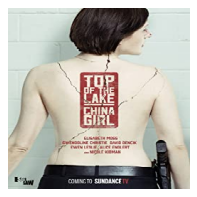

True Labels:
crime
drama
mystery
Predicted Labels:
1/1 [==============================] - 0s 43ms/step


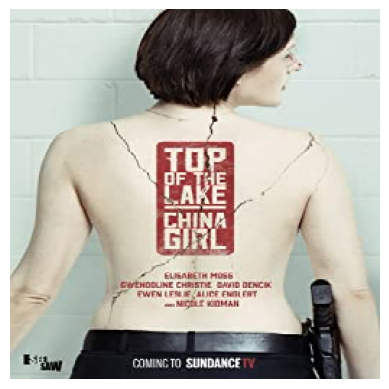

-----------------------------------


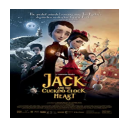

True Labels:
adventure
animation
drama
Predicted Labels:
1/1 [==============================] - 0s 33ms/step


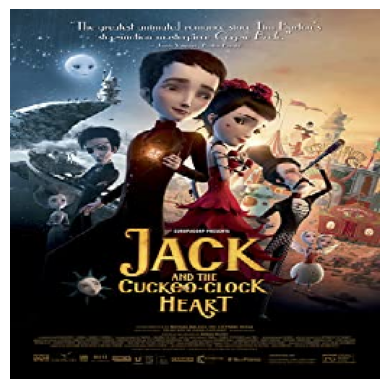

-----------------------------------


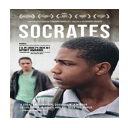

True Labels:
drama
Predicted Labels:
1/1 [==============================] - 0s 40ms/step


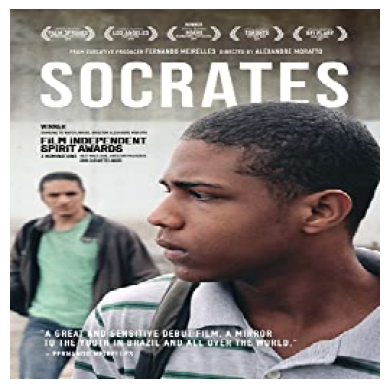

drama
-----------------------------------


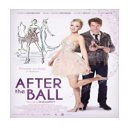

True Labels:
comedy
Predicted Labels:
1/1 [==============================] - 0s 39ms/step


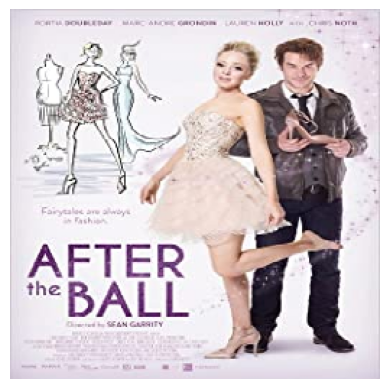

comedy
romance
-----------------------------------


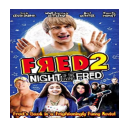

True Labels:
adventure
comedy
horror
Predicted Labels:
1/1 [==============================] - 0s 39ms/step


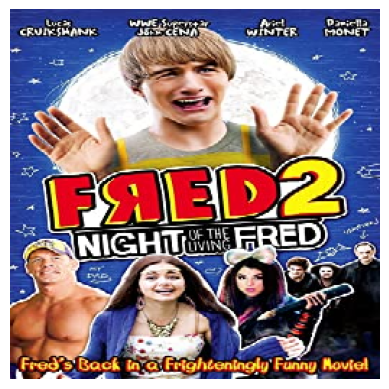

comedy
-----------------------------------


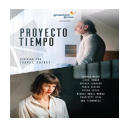

True Labels:
sci-fi
Predicted Labels:
1/1 [==============================] - 0s 33ms/step


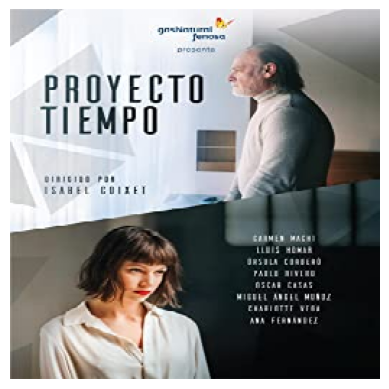

drama
-----------------------------------


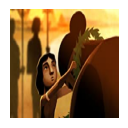

True Labels:
animation
short
Predicted Labels:
1/1 [==============================] - 0s 42ms/step


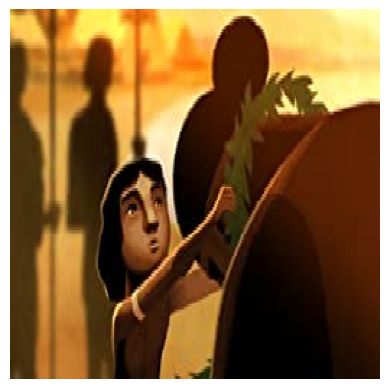

-----------------------------------


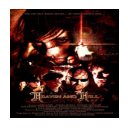

True Labels:
horror
mystery
thriller
Predicted Labels:
1/1 [==============================] - 0s 49ms/step


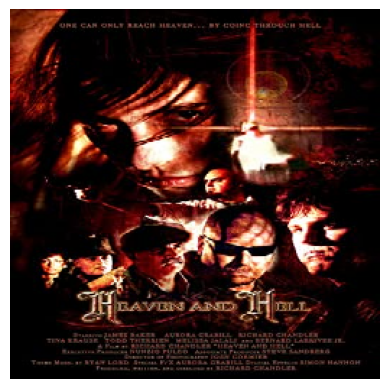

horror
-----------------------------------


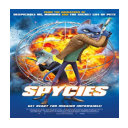

True Labels:
action
animation
comedy
Predicted Labels:
1/1 [==============================] - 0s 40ms/step


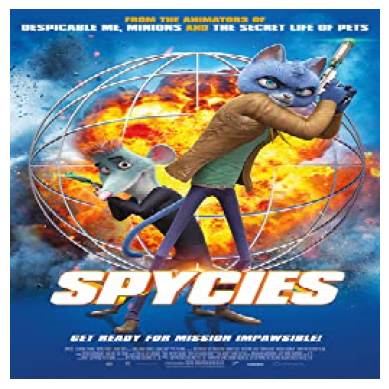

animation
comedy
-----------------------------------


In [74]:
# predicting 9 random images from the validation set and its true labels and predicted labels
figure(figsize=(10, 10), dpi=80)
for i in range(9):
    plt.subplot(3,3,i+1)
    path = val_df['image_path'].iloc[random.randint(0,val_df.shape[0])]
    plot_image(path)
    print('True Labels:')
    for i in range(len(labels)):
        if val_df[labels[i]].loc[val_df['image_path'] == path].values[0] == 1:
            print(labels[i])
    print('Predicted Labels:')
    predict_image(path)
    print('-----------------------------------')

<b>

The model encountered difficulties in predicting certain posters. However, for the remaining predictions, the model's categorization aligns with how a human, who hasn't seen the movie, would classify them.

## 4.2 Transfer Learning Model

We are utilizing a Transfer Learning model because they are highly effective in learning features.

In [82]:
# create a transfer learning model for predicting the genre of the movie using efficientnetb7
from tensorflow.keras.applications import EfficientNetB7

efficientnet = EfficientNetB7(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE+(3,))
efficientnet.trainable = False

input1 = keras.layers.Input(shape = IMAGE_SIZE+(3,))
x = efficientnet(input1)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation = 'relu')(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
x = keras.layers.Dense(64, activation = 'relu')(x)
x = keras.layers.Dense(32, activation = 'relu')(x)
output = keras.layers.Dense(13, activation = 'sigmoid')(x)

model = keras.Model(inputs = input1, outputs = output)

model.summary()

258076736/258076736 [==============================] - 101s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 8, 8, 2560)       64097687  
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 512)               1311232   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               3

In [83]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training the model
history = model.fit(train_generator, epochs = 5, validation_data = val_generator)

Epoch 1/5
525/525 [==============================] - 7896s 15s/step - loss: 0.4455 - accuracy: 0.1674 - val_loss: 0.4409 - val_accuracy: 0.2189
Epoch 2/5
  7/525 [..............................] - ETA: 1:45:54 - loss: 0.4346 - accuracy: 0.2411

KeyboardInterrupt: 

<b>

stopped because my laptop couldn't handel it. It took way too lang

## 4.3 Modeling & Validation (ResNet)

In [75]:
# building a ResNet model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = IMAGE_SIZE+(3,))
resnet.trainable = False

input1 = keras.layers.Input(shape = IMAGE_SIZE+(3,))
x = resnet(input1)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
output = Dense(13, activation = 'sigmoid')(x)

model = keras.Model(inputs = input1, outputs = output)

model.summary()

94765736/94765736 [==============================] - 53s 1us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               3289

In [76]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
# training the model
history = model.fit(train_generator, epochs = 5, validation_data = val_generator)

Epoch 1/5
525/525 [==============================] - 2391s 5s/step - loss: 0.4414 - accuracy: 0.2069 - val_loss: 0.4263 - val_accuracy: 0.2426
Epoch 2/5
525/525 [==============================] - 2287s 4s/step - loss: 0.4286 - accuracy: 0.2305 - val_loss: 0.4252 - val_accuracy: 0.2577
Epoch 3/5
525/525 [==============================] - 2332s 4s/step - loss: 0.4263 - accuracy: 0.2334 - val_loss: 0.4255 - val_accuracy: 0.2638
Epoch 4/5
525/525 [==============================] - 2321s 4s/step - loss: 0.4251 - accuracy: 0.2333 - val_loss: 0.4229 - val_accuracy: 0.2604
Epoch 5/5
525/525 [==============================] - 11277s 22s/step - loss: 0.4235 - accuracy: 0.2374 - val_loss: 0.4316 - val_accuracy: 0.2582


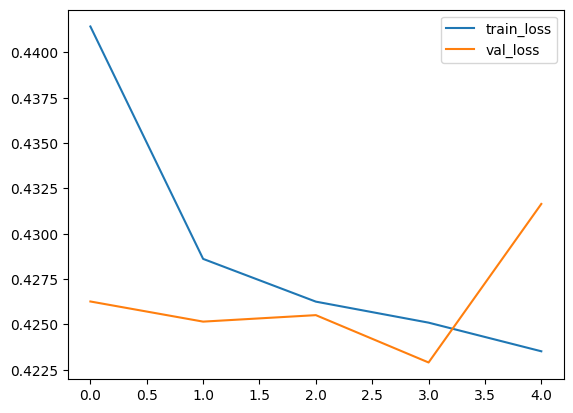

In [78]:
# plotting the loss
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

<b>

There is certainly something wrong, but it's difficult for me to pinpoint the exact issue as I haven't encountered a similar situation before. However, based on my research, it seems that the plot resembles an example of train and validation learning curves where the validation dataset may be relatively small compared to the training dataset.

In [79]:
# The accuracy of the model on the validation set
print('The accuracy of the model on the validation set is {}'.format(model.evaluate(val_generator)[1]))

# The accuracy of the model on the training set
print('The accuracy of the model on the training set is {}'.format(model.evaluate(train_generator)[1]))

132/132 [==============================] - 440s 3s/step - loss: 0.4316 - accuracy: 0.2582
The accuracy of the model on the validation set is 0.2582181990146637
525/525 [==============================] - 2017s 4s/step - loss: 0.4267 - accuracy: 0.2553
The accuracy of the model on the training set is 0.25530773401260376


<b>

The accuracy of the model on the validation set is very low, but I'm going to test it on 9 images to see the model's performance

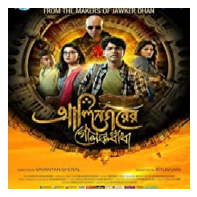

True Labels:
adventure
Predicted Labels:
1/1 [==============================] - 1s 1s/step


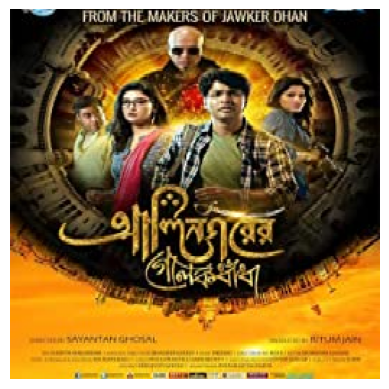

comedy
-----------------------------------


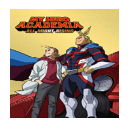

True Labels:
action
adventure
animation
Predicted Labels:
1/1 [==============================] - 0s 154ms/step


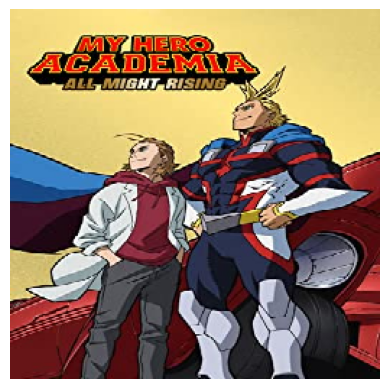

animation
comedy
-----------------------------------


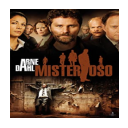

True Labels:
crime
Predicted Labels:
1/1 [==============================] - 0s 155ms/step


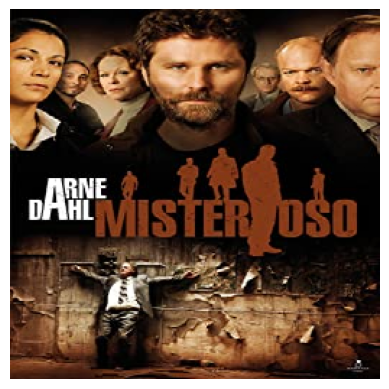

-----------------------------------


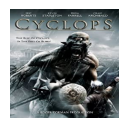

True Labels:
action
adventure
drama
Predicted Labels:
1/1 [==============================] - 0s 136ms/step


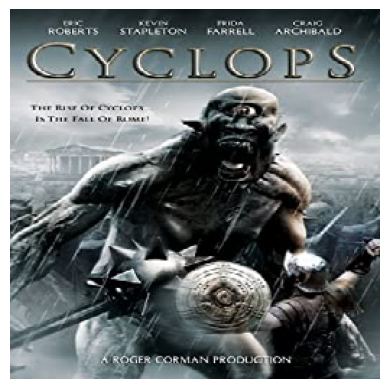

comedy
-----------------------------------


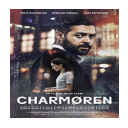

True Labels:
drama
romance
thriller
Predicted Labels:
1/1 [==============================] - 0s 172ms/step


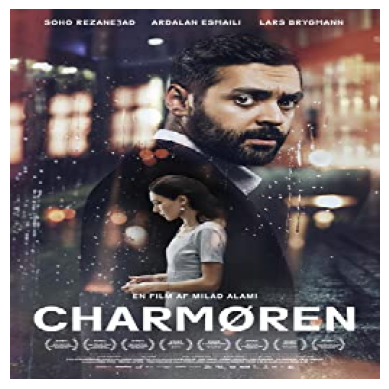

-----------------------------------


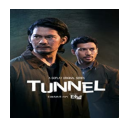

True Labels:
crime
drama
mystery
Predicted Labels:
1/1 [==============================] - 0s 157ms/step


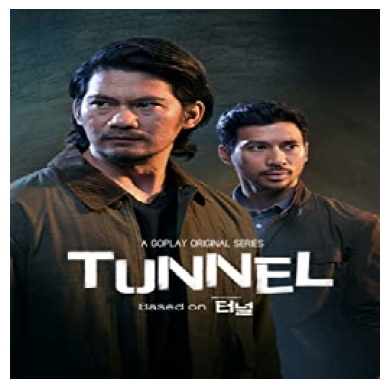

-----------------------------------


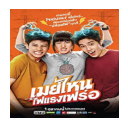

True Labels:
comedy
fantasy
romance
Predicted Labels:
1/1 [==============================] - 0s 162ms/step


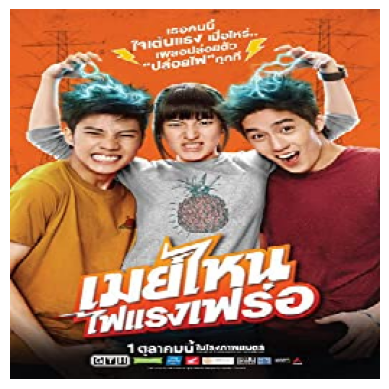

animation
comedy
-----------------------------------


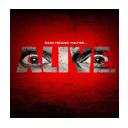

True Labels:
horror
thriller
Predicted Labels:
1/1 [==============================] - 0s 150ms/step


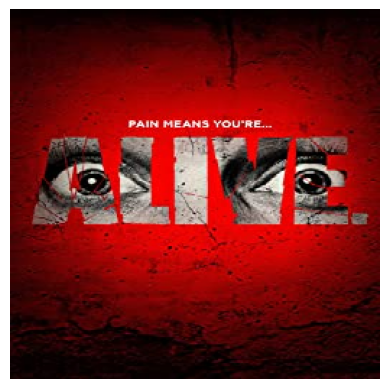

-----------------------------------


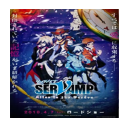

True Labels:
animation
fantasy
Predicted Labels:
1/1 [==============================] - 0s 155ms/step


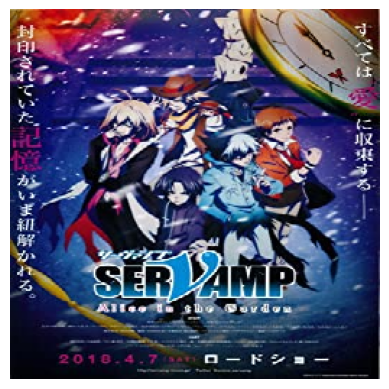

comedy
-----------------------------------


In [80]:
# predicting 9 random images from the validation set and its true labels and predicted labels
figure(figsize=(10, 10), dpi=80)
for i in range(9):
    plt.subplot(3,3,i+1)
    path = val_df['image_path'].iloc[random.randint(0,val_df.shape[0])]
    plot_image(path)
    print('True Labels:')
    for i in range(len(labels)):
        if val_df[labels[i]].loc[val_df['image_path'] == path].values[0] == 1:
            print(labels[i])
    print('Predicted Labels:')
    predict_image(path)
    print('-----------------------------------')

ResNet seems unsuitable for this task as most of the predictions are incorrect or absent. 